<a href="https://colab.research.google.com/github/Hallymhwangbo/2020-AI_minseo/blob/master/02_2_svm_hbms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

데이터 만들기

In [3]:
X, Y = (make_circles(n_samples=500, noise = 0.02))

In [4]:
X.shape

(500, 2)

In [5]:
Y.shape

(500,)

In [6]:
Y[:10]

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [7]:
x1 = X[:, 0]
x2 = X[:, 1]

(-1.1204793123516021,
 1.1275444384227036,
 -1.1250383263032102,
 1.136775436418323)

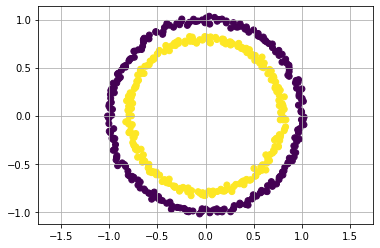

In [8]:
plt.scatter(x1, x2, c=Y)
plt.grid('on')
plt.axis('equal')

다른 하나의 축을 만들어서 3d로 보기

$$x3 = x1^2 + x2^2$$

In [9]:
x3 = x1**2 + x2**2

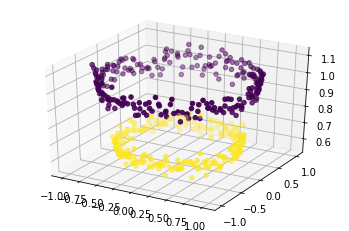

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=Y)

##SVM 테스트 #1

In [11]:
from sklearn.svm import SVC
model1 = SVC(kernel ='linear')

In [12]:
model1.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
def PlotSVM2D(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
    import matplotlib as mpl
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    fig = plt.figure(figsize=(5,5))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

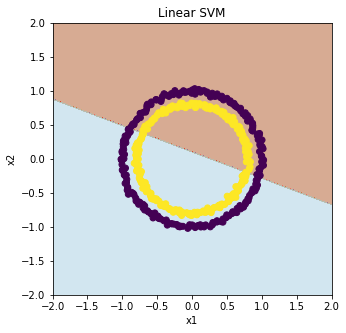

In [14]:
PlotSVM2D(X, Y, model=model1, title='Linear SVM')

결과: 선형으로 나누기는 원형의 데이터를 레이블 별로 나눌 수 없었다.

## SVM 테스트 #2

In [15]:
X.shape

(500, 2)

축을 하나 더 만들었음

In [16]:
X2 = np.vstack((x1, x2, x3)).T

In [17]:
X2.shape

(500, 3)

In [18]:
model2 = SVC(kernel ='linear')

In [19]:
model2.fit(X2, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
def PlotSVM3D(X, Y, model):
  import numpy as np
  X1 = X[:, 0]
  X2 = X[:, 1]
  X3 = X[:, 2]
  w = model.coef_ 
  b = model.intercept_ 

  x1, x2 = np.meshgrid(X1, X2) 
  x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

  fig = plt.figure() 
  axes2 = fig.add_subplot(111, projection = '3d') 
  axes2.scatter(X1, X2, X3, c = Y) 
  axes1 = fig.gca(projection = '3d') 
  axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
  #plt.show()

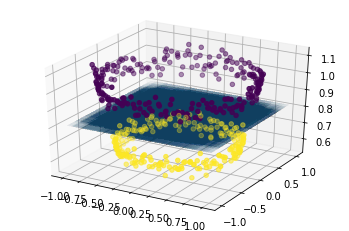

In [21]:
PlotSVM3D(X2, Y, model=model2)

결과: test#1과 마찬가지로 선형으로 나눴지만, 축을 하나 더 생성하여 3d의 형태로 만들어
데이터를 잘 나눴다.

## SVM 테스트 #3

In [22]:
model3 = SVC(kernel ='rbf')

In [23]:
model3.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
PlotSVM2D(X, Y, model=model3, title='RBF SVM')

결과: test#1과 같이 평면의 형태이지만, 데이터가 잘 나눠졌다. RBF사용